In [1]:
! pip install kagglehub

   ---------------------------------------- 0.0/51.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/51.9 kB ? eta -:--:--
   ----------------------- ---------------- 30.7/51.9 kB 435.7 kB/s eta 0:00:01
   ---------------------------------------- 51.9/51.9 kB 534.4 kB/s eta 0:00:00


In [52]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
import tensorboard as tfb
import pathlib
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Download Dataset


In [6]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("msambare/fer2013")

print("./data", path)

100%|█████████████████████████████████████████████████████████████████████████████| 60.3M/60.3M [00:21<00:00, 3.00MB/s]

Extracting files...


./data C:\Users\ziade\.cache\kagglehub\datasets\msambare\fer2013\versions\1


In [19]:
train_dataset = image_dataset_from_directory("train/", color_mode="grayscale", batch_size=64, image_size=(48,48))
test_dataset = image_dataset_from_directory("test/", color_mode="grayscale", batch_size=64, image_size=(48,48))

Found 28709 files belonging to 7 classes.
Found 7178 files belonging to 7 classes.


In [21]:
classes = ["angry", "disgust", "fear", "happy", "netural", "sad", "suprise"]

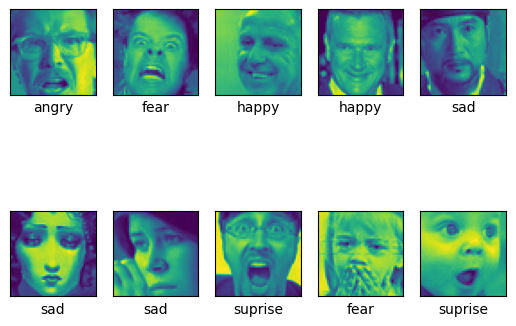

In [25]:
for image, target in train_dataset:
    for i in range(10):
        plt.subplot(2,5 ,i+ 1 )
        plt.imshow(image[i])
        plt.xlabel(classes[target[i]])
        plt.xticks([])
        plt.yticks([])

In [26]:
from collections import Counter
all_labels = []

for _, labels in  train_dataset:
    all_labels.extend(labels.numpy())

class_count = Counter(all_labels)
print(f"class Distributoin {class_count}")

class Distributoin Counter({3: 7215, 4: 4965, 5: 4830, 2: 4097, 0: 3995, 6: 3171, 1: 436})


In [28]:
test_labels = []

for _, labels in test_dataset:
    test_labels.extend(labels.numpy())

test_count = Counter(test_labels)

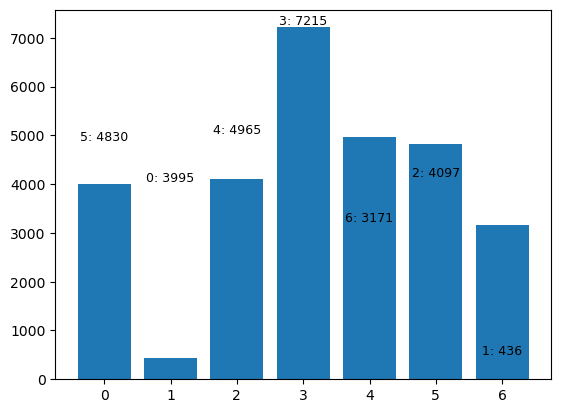

In [29]:
classes = list(class_count.keys())
values = list(class_count.values())
plt.bar(classes, values)
for i, value in enumerate(values):
    plt.text(i, value, f'{classes[i]}: {value}', ha='center', va='bottom', fontsize=9)

In [36]:
def normalize(data, label):
    return data / 255.0 , label
train_dataset = train_dataset.map(normalize)
test_dataset = test_dataset.map(normalize)

In [44]:
model = Sequential()
model.add(Conv2D(128, kernel_size=5, activation="relu", input_shape=(48,48,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(64, kernel_size=5, activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(100, activation="relu"))

model.add(Dense(7,activation="softmax"))

C:\Users\ziade\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [46]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 44, 44, 128)         │           3,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 22, 22, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 18, 18, 64)          │         204,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 9, 9, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 5184)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 100)                 │         518,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 7)                   │             707 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 727,399 (2.77 MB)

 Trainable params: 727,399 (2.77 MB)

 Non-trainable params: 0 (0.00 B)

In [48]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [56]:
early = EarlyStopping(monitor='accuracy',patience=4)

In [60]:
model.fit(train_dataset, epochs=100, callbacks=[early])

Epoch 1/100
449/449 ━━━━━━━━━━━━━━━━━━━━ 67s 150ms/step - accuracy: 0.2503 - loss: 1.8115 
Epoch 2/100
449/449 ━━━━━━━━━━━━━━━━━━━━ 66s 146ms/step - accuracy: 0.2764 - loss: 1.7557 
Epoch 3/100
449/449 ━━━━━━━━━━━━━━━━━━━━ 66s 146ms/step - accuracy: 0.3373 - loss: 1.6722 
Epoch 4/100
449/449 ━━━━━━━━━━━━━━━━━━━━ 65s 144ms/step - accuracy: 0.3647 - loss: 1.6242 
Epoch 5/100
449/449 ━━━━━━━━━━━━━━━━━━━━ 65s 145ms/step - accuracy: 0.3905 - loss: 1.5703 
Epoch 6/100
449/449 ━━━━━━━━━━━━━━━━━━━━ 65s 144ms/step - accuracy: 0.4059 - loss: 1.5335 
Epoch 7/100
449/449 ━━━━━━━━━━━━━━━━━━━━ 65s 145ms/step - accuracy: 0.4199 - loss: 1.5029 
Epoch 8/100
449/449 ━━━━━━━━━━━━━━━━━━━━ 65s 145ms/step - accuracy: 0.4305 - loss: 1.4793 
Epoch 9/100
449/449 ━━━━━━━━━━━━━━━━━━━━ 66s 146ms/step - accuracy: 0.4394 - loss: 1.4536 
Epoch 10/100
449/449 ━━━━━━━━━━━━━━━━━━━━ 65s 145ms/step - accuracy: 0.4496 - loss: 1.4334 
Epoch 11/100
449/449 ━━━━━━━━━━━━━━━━━━━━ 67s 148ms/step - accuracy: 0.4596 - loss: 1.410

KeyboardInterrupt: 